<a href="https://colab.research.google.com/github/Laser57/MNA_EQUIPO27/blob/main/TEAM27_MNA_IAyAA_semana_6_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Luis Alfonso Sabanero Esquivel A01273286
*   José Antonio Mendoza Castro    A01794067
*   Alan Avelino Fernández Juárez  A00989308
*   Miguel Angel Paredes Gutierrez A01794138
*   Fernando Sebastián Sánchez Cardona A01687530


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import GridSearchCV

#**Ejercicio-1.** 

In [ ]:
df = pd.read_csv('SouthGermanCredit.asc', sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
df.rename(columns = {
    'laufkont':'status', #categorical
    'laufzeit':'duration', #quantitative
    'moral':'credit_history', #categorical
    'verw':'purpose', #categorical
    'hoehe':'amount', #quantitative
    'sparkont':'savings',#categorical
    'beszeit':'employment_duration', #ordinal
    'rate':'installment_rate', #ordinal
    'famges':'personal_status_sex', #categorical
    'buerge':'other_debtors', #categorical
    'wohnzeit':'present_residence', #ordinal
    'verm':'property', #ordinal
    'alter':'age', #quantitative
    'weitkred':'other_installment_plans', #categorical
    'wohn':'housing', #categorical
    'bishkred':'number_credits', #ordinal
    'beruf':'job', #ordinal
    'pers':'people_liable', #binary
    'telef':'telephone', #binary
    'gastarb':'foreign_worker', #binary
    'kredit':'credit_risk' #binary
}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**

In [ ]:
X=df.iloc[:,0:20] #Todas menos el credit_risk
y=df["credit_risk"] #Para la de salida

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)

#y_train.sum() / y_train.shape[0]
#Dataset desbalanceado verificar mas tarde

In [ ]:
test= pd.DataFrame(y_train).copy()

test

,credit_risk
809,0
537,1
344,1
999,0
800,0
...,...
337,1
91,1
80,1
703,1


#**Ejercicio-3.**

In [ ]:
#quantitative aka numerica 
categorical= ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']
ordinal=['employment_duration','installment_rate','present_residence','property','number_credits','job']
quantitative=['duration','amount','age']
binary=['people_liable','telephone','foreign_worker']

In [ ]:
#consultar actividad semana 2, se opta por transformar logaritmo porque deja la camapana de mejor forma
#categoricas aunque no estan vacias por precaucion aquellas vacias que se ponga la moda
#numericas que se rellene con la media de momento, minmax scaler para escalar todas al mismo rango
# Transformaciones a factores numéricos de entrada:
quantitative_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2))),
                                 ('log',FunctionTransformer(np.log))])   
quantitative_pipeline_nombres = quantitative

# Transformaciones a factores categóricos de entrada:
categorical_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                ('OneHotE', OneHotEncoder(handle_unknown="infrequent_if_exist",drop="first"))])  
categorical_pipeline_nombres = categorical

catOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),
                                ('OneHotE', OneHotEncoder(handle_unknown="infrequent_if_exist",drop="first"))])
catOHE_pipeline_nombres = binary


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', quantitative_pipeline, quantitative_pipeline_nombres),
                                                        ('catimp', categorical_pipeline, categorical_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-4.**

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(max_iter=3000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # RF - RANDOM FOREST:
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  
  return modelos, nombres

def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

  
def mi_recall(yreal, ypred):
  #VP/VP+FN
  cm = confusion_matrix(yreal, ypred) #Primero yreal, segundo pred
  VP=cm[1][1]
  FN=cm[1][0]

  return VP/(VP+FN)

def mi_f1(yreal, ypred):
  #2vp / 2vp+fp+fn
  cm = confusion_matrix(yreal, ypred)
  VP=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]
  return 2*VP/(2*VP+FN+FP)

def mi_gmean(yreal, ypred):
  cm=confusion_matrix(yreal,ypred)
  recall=mi_recall(yreal, ypred)
  especifidad= cm[0][0] /(cm[0][0]+cm[0][1])
  gmean = np.sqrt(recall*especifidad)

  return gmean

In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10) #RANDOM STATE PARA DEBUGEAR 

  mismetricas =  {"accuracy": make_scorer(mi_accuracy),
                  "precision": make_scorer(mi_precision),
                  'F1':make_scorer(mi_f1), 
                  'recall':make_scorer(mi_recall),
                  'gmean':make_scorer(mi_gmean)}

  scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv,return_train_score=True)

  resultados.append(scores)

  print('%s:\nAccuracy: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nRecall: %.3f (%.4f)\nF1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']), 
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']), 
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean'])
                                                                          ))
  print('%s:\ntrain Accuracy: %.3f (%.4f)\ntrain Precision: %.3f (%.4f)\ntrain Recall: %.3f (%.4f)\ntrain F1score: %.3f (%.4f)\ntrain Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['train_accuracy']),
                                                                          np.std(scores['train_accuracy']), 
                                                                          np.mean(scores['train_precision']),
                                                                          np.std(scores['train_precision']), 
                                                                          np.mean(scores['train_recall']),
                                                                          np.std(scores['train_recall']),
                                                                          np.mean(scores['train_F1']),
                                                                          np.std(scores['train_F1']),
                                                                          np.mean(scores['train_gmean']),
                                                                          np.std(scores['train_gmean'])
                                                                          ))                                                                    

LR:
Accuracy: 0.757 (0.0277)
Precision: 0.797 (0.0270)
Recall: 0.879 (0.0326)
F1score: 0.836 (0.0187)
Gmean: 0.638 (0.0585)

LR:
train Accuracy: 0.790 (0.0097)
train Precision: 0.820 (0.0070)
train Recall: 0.898 (0.0081)
train F1score: 0.858 (0.0066)
train Gmean: 0.694 (0.0144)

DT:
Accuracy: 0.695 (0.0277)
Precision: 0.785 (0.0236)
Recall: 0.781 (0.0296)
F1score: 0.782 (0.0208)
Gmean: 0.618 (0.0438)

DT:
train Accuracy: 1.000 (0.0000)
train Precision: 1.000 (0.0000)
train Recall: 1.000 (0.0000)
train F1score: 1.000 (0.0000)
train Gmean: 1.000 (0.0000)

RF:
Accuracy: 0.756 (0.0265)
Precision: 0.781 (0.0196)
Recall: 0.908 (0.0265)
F1score: 0.840 (0.0174)
Gmean: 0.599 (0.0537)

RF:
train Accuracy: 1.000 (0.0000)
train Precision: 1.000 (0.0000)
train Recall: 1.000 (0.0000)
train F1score: 1.000 (0.0000)
train Gmean: 1.000 (0.0000)



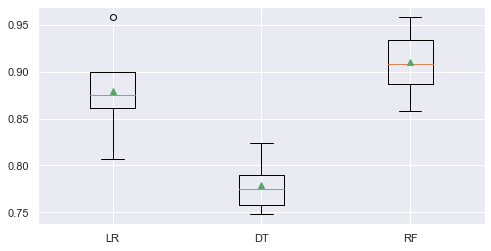

In [ ]:
#Diagrama de caja
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

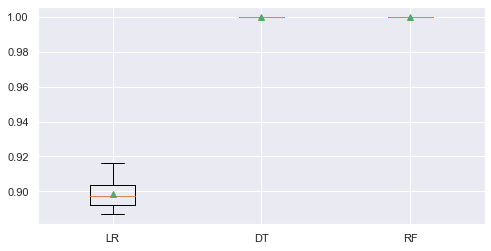

In [ ]:
#Diagrama de caja
sns.set(rc={'figure.figsize':(8,4)})

bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['train_recall']
  bprecall.append(rr)

plt.boxplot(bprecall, labels=nombres, showmeans=True)

plt.show()

In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(10,10))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def mi_validationCurvePlot(train_scores,valid_scores,param):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)



    plt.plot(param, train_mean, color='blue', marker='o', markersize=5, label='Training')

    # Curva de validación:
    plt.plot(param, valid_mean, color='red', marker='o', markersize=5, label='Validation')

    plt.title('Función validation_curve()')
    plt.xlabel('Valores de funcion learning curve')
    plt.ylabel('Recall')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    return 

/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packa

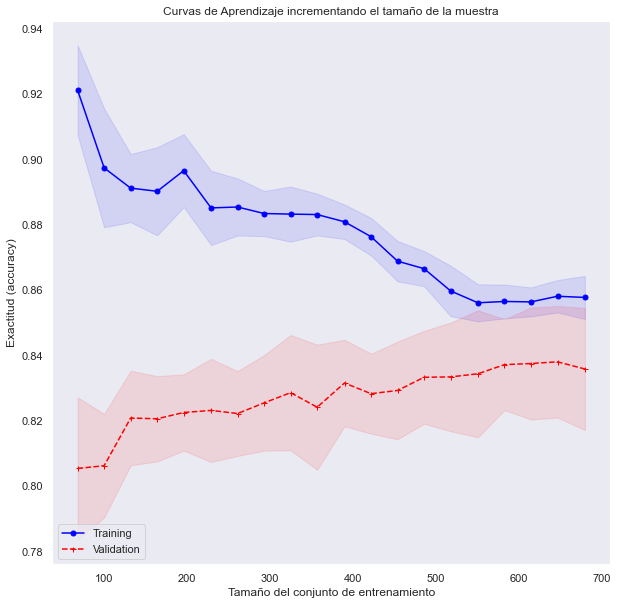

In [ ]:

pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[0])])

delta_train_sz = np.linspace(0.1,1,20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10) #RANDOM STATE PARA DEBUGEAR 

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = cv ,
                                                 scoring=make_scorer(mi_f1),
                                                 train_sizes = delta_train_sz ,
                                                 random_state=10)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sk

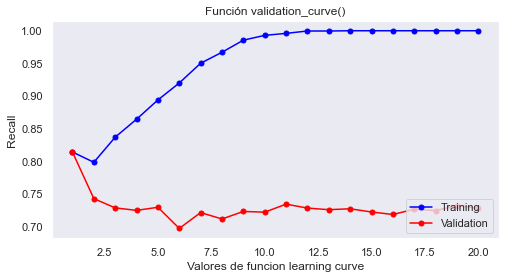

In [ ]:
max_depth = np.linspace(1,20,20, dtype="int")
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[1])])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11) #RANDOM STATE PARA DEBUGEAR 

train_scores, valid_scores = validation_curve(pipeline, 
                                              X_val, 
                                              y_val, 
                                              param_name="m__max_depth", 
                                              param_range=max_depth,
                                              cv=cv,
                                              scoring=make_scorer(mi_f1))

mi_validationCurvePlot(train_scores,valid_scores,max_depth)

/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packa

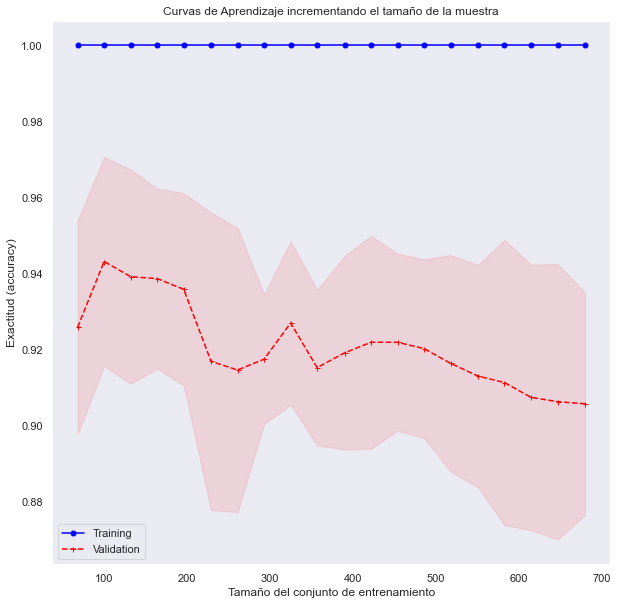

In [ ]:
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[2])])

delta_train_sz = np.linspace(0.1,1,20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11) #RANDOM STATE PARA DEBUGEAR 

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = cv ,
                                                 scoring=make_scorer(mi_recall),
                                                 train_sizes = delta_train_sz ,
                                                 random_state=10)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

#**Ejercicio-5.**

Mejor valor de exactitud obtenido con la mejor combinación: 0.8341054584809675
Mejor combinación de valores encontrados de los hiperparámetros: {'m__C': 0.1, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_f1)


/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages

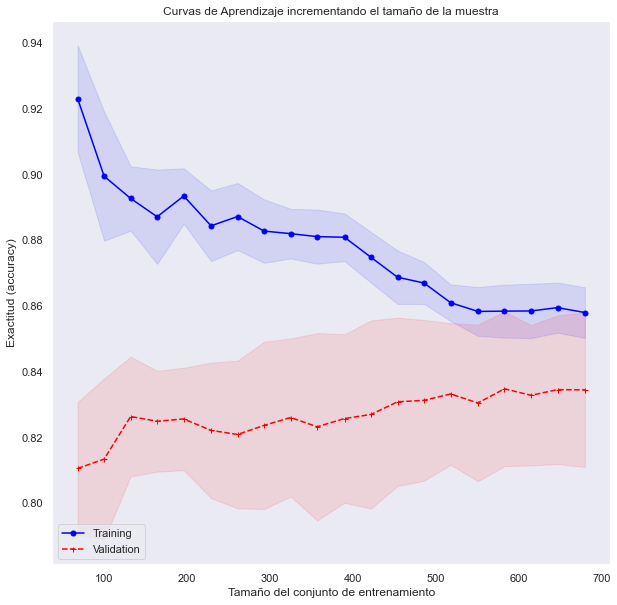

In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[0])])

param_grid = {
    'm__C':[0.0001,0.01,0.1,1.0,10.,100.],
    'm__solver':['liblinear', 'saga'],
    'm__class_weight': ['balanced', None],
    'm__penalty': ['l1', 'l2']
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_f1))

grid.fit(X_train, y_train)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)



In [ ]:
modelo = LogisticRegression(max_iter=10000, random_state=1, C=1.0, class_weight=None, penalty='l2', solver='liblinear')
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = X_train,
  y = y_train,
  cv = kfold ,
  scoring='f1',
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-59-1224bd3219fe>:27: RuntimeWarni

Mejor valor de exactitud obtenido con la mejor combinación: 0.8839544857334098
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.0001, 'm__class_weight': 'balanced', 'm__criterion': 'gini', 'm__max_depth': 1, 'm__min_samples_split': 0.0001}
Métrica utilizada: make_scorer(mi_precision)


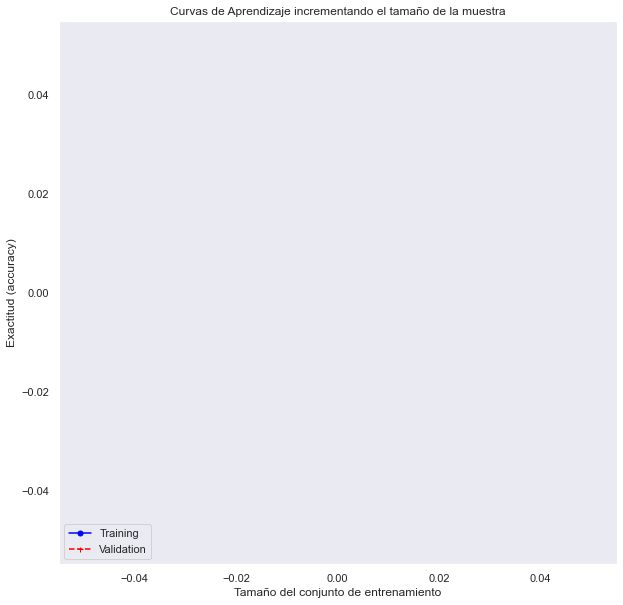

In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=11)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[1])])

param_grid = {
    'm__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': [0.0001,0.01,0.1,1.0],
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_precision))

grid.fit(X_train, y_train)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)



/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/luis/opt/anaconda3/lib/python3.8/site-packa

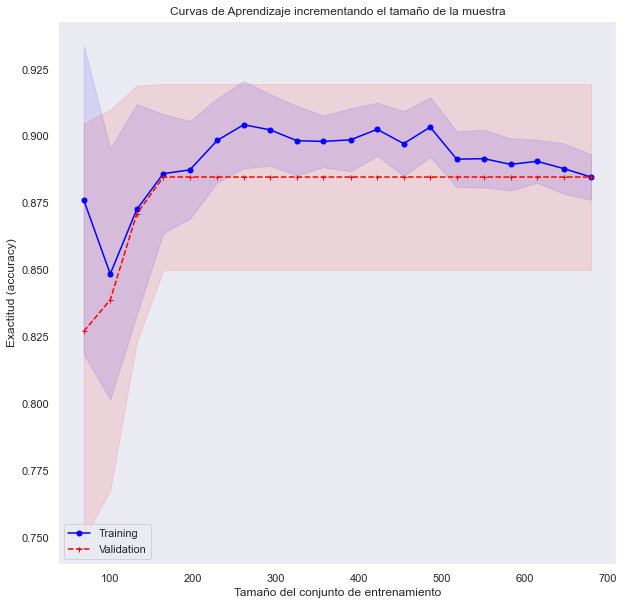

In [ ]:
modelo = DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced', criterion='gini', max_depth=1, min_samples_split=0.0001)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
tr_sizes, tr_scores, val_scores = learning_curve(
  estimator = pipeline ,    
  X = X_train,
  y = y_train,
  cv = kfold ,
  scoring=make_scorer(mi_precision),
  train_sizes = delta_train_sz,
  random_state=11
)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

In [ ]:
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=11)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[2])])

param_grid = {
    'm__ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100.],
    'm__criterion':['gini', 'entropy', 'log_loss'],
    'm__max_depth': max_depth,
    'm__min_samples_split': [0.0001,0.01,0.1,1.0],
    'm__class_weight': ['balanced', None]
}

grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=kfold,
                    scoring=make_scorer(mi_recall))

grid.fit(X_train, y_train)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)



In [ ]:
modelo = RandomForestClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini', max_depth=0.0001, min_samples_split=0.0001)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
delta_train_sz = np.linspace(0.1, 1.0, num=20)
param_range = np.linspace(1,10,10, dtype="int")
t_scores, v_scores = validation_curve(
    estimator= pipeline,
    X = X_train,
    y = y_train,
    param_name = "m__max_depth",
    param_range = param_range,
    cv = kfold,
    scoring = make_scorer(mi_recall)
)
mi_LearningCurvePlot(param_range, t_scores, v_scores)

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**